In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data

In [219]:
path_data = '/home/darkknight/real-estate-integration/prj-exam/data-matching/final_data_full_feature.csv'
final_data = pd.read_csv(path_data)
final_data

,title,description,price,square,name_contact,phone_contact,date,direct,street,floor,...,width,link_image,url_page,kitchen,parking,terrace,type,district,province,ward
0,Chính chủ bán gấp căn hộ q4,"Chính chủ bán gấp Căn hộ 2 PN, 2 WC , tầng cao...",3.250000e+09,0 m,NaN,NaN,25/03/2022,Đông,None,0 t,...,0 m,https://nhadat24h.net.vn/storage/product/121/o...,https://nhadat24h.net.vn/du-an/chinh-chu-ban-g...,Không,Không,Không,Cần bán căn hộ chung cư,4,Hồ Chí Minh,01
1,Bán căn hộ Gold View Full NT Q4 .1pn -2pn-3pn,"2PN, DT 80m2 : Giá từ 3.8 tỷ - 4.2tỷ 2PN, DT 9...",3.350000e+09,0 m,NaN,NaN,22/03/2022,Đông,None,0 t,...,0 m,https://nhadat24h.net.vn/storage/product/121/0...,https://nhadat24h.net.vn/du-an/ban-can-ho-gold...,Không,Không,Không,Cần bán căn hộ chung cư,4,Hồ Chí Minh,01
2,"Căn hộ Galaxy 9, 1 phòng ngủ, đã có sổ, view đẹp","Cần bán căn hộ Galaxy 9, Nguyễn Khoái, Quận 4,...",2.700000e+09,0 m,NaN,NaN,22/03/2022,Bắc,None,0 t,...,0 m,https://nhadat24h.net.vn/storage/product/121/c...,https://nhadat24h.net.vn/du-an/can-ho-galaxy-9...,Không,Không,Không,Cần bán căn hộ chung cư,4,Hồ Chí Minh,01
3,"Cần Bán căn hộ Gold View 81m2 full NT 3,900 triệu",Căn hộ cao cấp The Gold View nằm mặt tiền Bến ...,3.950000e+09,0 m,NaN,NaN,22/03/2022,Đông Bắc,None,0 t,...,0 m,https://nhadat24h.net.vn/storage/product/121/u...,https://nhadat24h.net.vn/du-an/can-ban-can-ho-...,Không,Không,Không,Cần bán căn hộ chung cư,4,Hồ Chí Minh,01
4,Bán 2 phòng ngủ Gold View giá cực mềm,Chủ nhà gửi bán căn hộ 2 phòng ngủ Gold View: ...,3.700000e+09,0 m,NaN,NaN,22/03/2022,Đông,None,0 t,...,0 m,https://nhadat24h.net.vn/storage/product/121/I...,https://nhadat24h.net.vn/du-an/ban-2-phong-ngu...,Không,Không,Không,Cần bán căn hộ chung cư,4,Hồ Chí Minh,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25508,Dự án Khu đô thị Bình An Đức Hòa - The Win City,None,1.000000e+09,65 m,Ngô Kim Phụng,0901.907.XXX,16/06/2022,None,Tỉnh lộ 10,0 t,...,0m,https://alonhadat.com.vnnan,https://alonhadat.com.vn/du-an-the-win-city-du...,Có,Có,Có,Cần bán căn hộ chung cư,Đức Hòa,lộ 10,Đức Hoà Hạ
25509,SỞ HỮU NGAY CĂN HỘ THE WIN CITY NẰM TẠI MẶT TI...,"""Dự án chung cư giá rẻ dành riêng cho phân khú...",1.000000e+09,65 m,Ngô Kim Phụng,0901907148,18/06/2022,NaN,Tỉnh Lộ 10,1 t,...,NaN,https://bds123.cdn.static123.com/images/thumbs...,https://bds123.vn/so-huu-can-ho-the-win-city-m...,NaN,NaN,NaN,Cần bán căn hộ chung cư,None,Lộ 10,Đức Hoà Đông
25510,"Bán căn hộ, DT 823, Đức Hòa, Long An, giá cực ...",None,2.250000e+07,120 m,Nguyễn Hồng Hải,0974.041.XXX,15/06/2022,Nam,Tỉnh lộ 823,1 t,...,6m,https://alonhadat.com.vnnan,https://alonhadat.com.vn/ban-can-ho-dt-823-duc...,Có,Có,Không,Cần bán căn hộ chung cư,Đức Hòa,lộ 823,Đức Lập Thượng
25511,Mở Bán Chung Cư XPHomes Star Tân Tây Đô Quốc L...,XP HOME TÂN TÂY ĐÔ\nChỉ từ 700TR sở hữu ngay c...,1.290000e+09,64 m,Sơn Nguyễn,0961.701.XXX,17/06/2022,None,Quốc lộ 32,0 t,...,0m,https://alonhadat.com.vn/files/properties/2022...,https://alonhadat.com.vn/mo-ban-chung-cu-xphom...,Không,Không,Không,Cần bán căn hộ chung cư,Hoài Đức,Hà Nội,Đức Thượng


In [220]:
final_data.columns

Index(['title', 'description', 'price', 'square', 'name_contact',
       'phone_contact', 'date', 'direct', 'street', 'floor', 'juridical',
       'bedroom', 'length', 'width', 'link_image', 'url_page', 'kitchen',
       'parking', 'terrace', 'type', 'district', 'province', 'ward'],
      dtype='object')

In [221]:
# new_data = final_data.merge(right=data, how='left', on=['title', 'description', 'square', 'name_contact',
#        'phone_contact', 'date', 'direct', 'street', 'floor', 'juridical',
#        'bedroom', 'length', 'width', 'link_image', 'url_page', 'kitchen',
#        'parking', 'terrace',] ).drop(["price_y"], axis=1,).rename(columns={"price_x":"price"})
# new_data

In [222]:
PROVINCES = ["An Giang", "Vũng Tàu", "Bạc Liêu", "Bắc Kạn", "Bắc Giang", "Bắc Ninh", "Bến Tre", "Bình Dương",
             "Bình Định", "Bình Phước", "Bình Thuận", "Cà Mau", "Cao Bằng", "Cần Thơ", "Đà Nẵng", "Đak Lak", "Đak Nông",
             "Điện Biên", "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Nội", "Hà Tây", "Hà Tĩnh",
             "Hải Dương", "Hải Phòng", "Hòa Bình", "Hồ Chí Minh", "Hậu Giang", "Hưng Yên", "Khánh Hòa", "Kiên Giang",
             "Kon Tum", "Lai Châu", "Lào Cai", "Lạng Sơn", "Lâm Đồng", "Long An", "Nam Định", "Nghệ An", "Ninh Bình",
             "Ninh Thụân", "Phú Thọ", "Phú Yên", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh", "Quảng Trị",
             "Sóc Trăng", "Sơn La", "Tây Ninh", "Thái Bình", "Thái Nguyên", "Thanh Hóa", "Thừa Thiên Huế", "Tiền Giang",
             "Trà Vinh", "Tuyên Quang", "Vĩnh Long", "Vĩnh Phúc", "Yên Bái"]
def convert_province(x):
    for province in PROVINCES:
        if x.find(province) != -1:
            x = province
    return x

In [223]:
def convert_square(x):
    x = x.strip(' m')
    try:
        x = float(x)
    except:
        x = 0
    return x

def convert_floor(x):
    x = x.strip(' t')
    try:
        x = float(x)
    except:
        x = 0
    return x

def convert_bedroom(x):
    x = str(x).strip(' pn')
    try:
        x = float(x)
    except:
        x = 0
    return x

def convert_length(x):
    x = str(x).strip('m').strip(' ')
    try:
        x = float(x)
    except:
        x = 0
    return x

def convert_width(x):
    x = str(x).strip('m').strip(' ')
    try:
        x = float(x)
    except:
        x = 0
    return x

def convert_kitchen(x):
    if x == ' Không':
        x = 'Không'
    if x == ' Có':
        x = 'Có'
    return x

def convert_parking(x):
    if x == ' Không':
        x = 'Không'
    if x == ' Có':
        x = 'Có'
    return x

def convert_terrace(x):
    if x == ' Không':
        x = 'Không'
    if x == ' Có':
        x = 'Có'
    return x

In [224]:
# preprocess
final_data["square"] = final_data["square"].map(lambda x: convert_square(x))
final_data["floor"] = final_data["floor"].map(lambda x: convert_floor(x))
final_data["bedroom"] = final_data["bedroom"].map(lambda x: convert_bedroom(x))
final_data["length"] = final_data["length"].map(lambda x: convert_length(x))
final_data["width"] = final_data["width"].map(lambda x: convert_width(x))
final_data["kitchen"] = final_data["kitchen"].map(lambda x: convert_kitchen(x))
final_data["parking"] = final_data["parking"].map(lambda x: convert_parking(x))
final_data["terrace"] = final_data["terrace"].map(lambda x: convert_terrace(x))
final_data["province"] = final_data["province"].map(lambda x: x.strip(' '))
final_data["province"] = final_data["province"].map(lambda x: convert_province(x))

# Info data

In [225]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25513 entries, 0 to 25512
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          25513 non-null  object 
 1   description    25513 non-null  object 
 2   price          24508 non-null  float64
 3   square         25513 non-null  float64
 4   name_contact   24477 non-null  object 
 5   phone_contact  24477 non-null  object 
 6   date           25513 non-null  object 
 7   direct         17647 non-null  object 
 8   street         25513 non-null  object 
 9   floor          25513 non-null  float64
 10  juridical      17795 non-null  object 
 11  bedroom        25513 non-null  float64
 12  length         17795 non-null  float64
 13  width          17795 non-null  float64
 14  link_image     25363 non-null  object 
 15  url_page       25513 non-null  object 
 16  kitchen        17795 non-null  object 
 17  parking        17795 non-null  object 
 18  terrac

In [226]:
final_data.describe()

,price,square,floor,bedroom,length,width
count,2.450800e+04,25513.000000,25513.000000,25513.000000,17795.000000,17795.000000
mean,5.508835e+13,82.503901,6.120684,2.622977,11.058915,9.422051
std,8.623426e+15,364.283878,15.679812,19.880003,246.749650,228.706047
min,1.250000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.390000e+09,54.000000,1.000000,1.000000,0.000000,0.000000
50%,2.200000e+09,70.000000,1.000000,2.000000,0.000000,0.000000
75%,3.450000e+09,86.000000,8.000000,2.000000,0.000000,0.000000
max,1.350000e+18,45792.000000,988.000000,2242.000000,10230.000000,9000.000000


# Check no-info values

In [227]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25513 entries, 0 to 25512
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          25513 non-null  object 
 1   description    25513 non-null  object 
 2   price          24508 non-null  float64
 3   square         25513 non-null  float64
 4   name_contact   24477 non-null  object 
 5   phone_contact  24477 non-null  object 
 6   date           25513 non-null  object 
 7   direct         17647 non-null  object 
 8   street         25513 non-null  object 
 9   floor          25513 non-null  float64
 10  juridical      17795 non-null  object 
 11  bedroom        25513 non-null  float64
 12  length         17795 non-null  float64
 13  width          17795 non-null  float64
 14  link_image     25363 non-null  object 
 15  url_page       25513 non-null  object 
 16  kitchen        17795 non-null  object 
 17  parking        17795 non-null  object 
 18  terrac

In [228]:
na_percent = (final_data.isna().sum() / final_data.count() * 100).to_frame()
na_percent

,0
title,0.000000
description,0.000000
price,4.100702
square,0.000000
name_contact,4.232545
phone_contact,4.232545
date,0.000000
direct,44.574149
street,0.000000
floor,0.000000


# Visualize some features

In [229]:
final_data["province"] = final_data["province"].map(lambda x: x.strip(' '))
final_data["province"].unique()

array(['Hồ Chí Minh', 'Tuy Hòa', 'Tân An', 'Tây Ninh', 'Vũng Tàu',
       'Đà Lạt', 'Bà Rịa', 'Việt Nam', 'TPHCM', 'Lâm Đồng', 'Tp.HCM',
       'Mỹ Tho', 'Vĩnh Long', 'Đông Hà', 'Phú Yên', 'Bình Dương',
       'Biên Hoà', 'Dĩ An', 'lộ 743', 'Đồng Nai', 'Huế', 'Hải Phòng',
       'Cần Thơ', 'Kiên Giang', 'Rạch Giá', 'Đà Nẵng', 'Hà Nội',
       'Hà Nội', 'Thủ Đức', 'Thuận An', 'Long An', 'lộ 824', 'lộ 830',
       'Phú Quốc', 'Thừa Thiên Huế', 'Cam Ranh', 'Thanh Hóa', 'Nam Định',
       'Quảng Ninh', 'Hạ Long', 'Hải Dương', 'Bình Thuận', 'lộ 10',
       'Quy Nhơn', 'Quảng Bình', 'Đồng Hới', 'Long Khánh', 'Phú Thọ',
       'Lộ 317', 'Hưng Yên', 'Vinh', 'Thái Nguyên', 'Khánh Hòa', 'Pleiku',
       'Sơn La', 'Thủ Dầu Một', 'lộ 639', 'Hội An', 'Quảng Nam',
       'Cẩm Phả', 'lộ 179', 'Nha Trang', 'Hòa Bình', 'Bắc Giang',
       'Đắk Lắk', 'Bình Định', 'TP. Hà Nội', 'lộ 47', 'Bắc Ninh',
       'lộ 510', 'lộ 510B', 'Hà Tĩnh', 'Phan Thiết', 'Nghệ An',
       'Vĩnh Phúc', 'Vĩnh Yên', 'Móng C

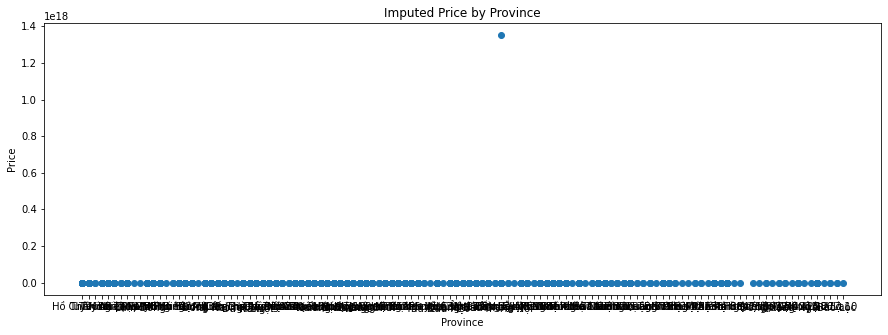

In [231]:
x = final_data['province']
y = final_data['price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by Province')
plt.xlabel('Province')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()